In [1]:
# 将代码包路径导入python搜索路径, 导入一些必要模块
import os
import sys
# 该部分为python搜索路径，调用本地的代码包，若使用服务器环境，需注释掉该部分内容
package_path_2 = r'/Users/liliangshan/workspace/python/daily_code/tl_modeler'
sys.path.insert(0, package_path_2)

import pandas as pd
import matplotlib.pyplot as plt

import tl_modeler as tlm

In [2]:
# path_project
path_project = r'/Users/liliangshan/workspace/python/01_datasets/AMEX_Default_Prediction'

# 文件夹
path_row_data = os.path.join(path_project, 'row_data')
path_new_data = os.path.join(path_project, 'new_data')
path_results = os.path.join(path_project, 'results')

# row_data
path_row_train = os.path.join(path_row_data,  'train_data.ftr')
path_row_test  = os.path.join(path_row_data, 'test_data.ftr')
path_train_label = os.path.join(path_row_data, 'train_labels.csv')



## results
path_output_report = os.path.join(path_results, 'scorecard_report.xlsx')

y_label = 'target'

![20220710150250](https://imgs-heheomg.oss-cn-hangzhou.aliyuncs.com/blog_imgs/20220710150250.png)
# 比赛简介
链接：[American Express - Default Prediction](https://www.kaggle.com/competitions/amex-default-prediction/overview/prizes-and-hiring)

美国运通是一家全球综合支付公司。作为全球最大的支付卡发卡机构，他们为客户提供产品、见解和体验，丰富生活并取得业务成功。  

在本次比赛中，您将运用机器学习技能来预测信用违约。 具体来说，您将利用工业规模的数据集来构建机器学习模型，以挑战生产中的当前模型。


# 数据及背景
本次比赛的目的是根据客户每月的客户资料预测客户未来不偿还信用卡余额的概率。 目标二元变量是通过观察最近一次信用卡账单后18个月的表现窗口来计算的，如果客户在最近一次账单日后的120天内未支付到期金额，则将其视为违约事件。

该数据集为每个客户的每个报表日期的特征文件汇总，特征为匿名及归一化的，分别有以下类别的特征：
+ D_* = 逾期变量
+ S_* = Spend variables
+ P_* = Payment variables
+ B_* = 余额变量
+ R_* = 风险变量

下列变量为类别变量：  
['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

你的任务是为每个预测customer_ID未来付款违约的概率 ( target = 1)。

请注意，该数据集的负类已被二次抽样为5%，因此在评分指标中获得了20倍的权重。

**文件**
+ train_data.csv - 具有多个语句日期的训练数据customer_ID
+ train_labels.csv - target每个标签customer_ID
+ test_data.csv - 对应的测试数据；你的目标是预测target每个标签customer_ID
+ sample_submission.csv - 格式正确的示例提交文件

In [3]:
df_labels = tlm.read_data(path_train_label)

df_train = tlm.read_data(path_row_train)
df_test  = tlm.read_data(path_row_test)

# 训练集标签

## 标签探查

In [4]:
# 训练集标签缺失，重复情况
print('训练集标签,缺失情况:{}，重复情况:{}'.format(df_labels.isna().any().any(), 
                        df_labels['customer_ID'].duplicated().any()))

训练集标签,缺失情况:False，重复情况:False


In [5]:
_ = tlm.excel_label(df_labels, y=y_label, excel_path=path_output_report, show=True)

------------------------------------------------------------------------------------------
标签分布展示如下:

数据集样本有: 458913个,特征列有:1列, 标签列为: target


,label取值,label数量,label占比
0,0,340085,74.11%
1,1,118828,25.89%


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0


------------------------------------------------------------------------------------------


sheet01.标签分布分析在/Users/liliangshan/workspace/python/01_datasets/AMEX_Default_Prediction/results/scorecard_report.xlsx中已经存在，我们将对原文件进行覆盖


## 标签结果

<font color="#dd0000">1. 训练集中customer_ID无重复，无缺失。</font>   
<font color="#dd0000">2. 训练集标签中，customer_ID共458913个，正负样本比率为25.89%和74.11%。</font>

# 特征情况

## 特征数据量

In [6]:
print('训练集历史特征数量：',df_train.shape)
print('测试集历史特征数量：',df_test.shape)

print('训练集customer_ID数量：',df_train['customer_ID'].nunique())
print('测试集customer_ID数量：',df_test['customer_ID'].nunique())

训练集历史特征数量： (5531451, 191)
测试集历史特征数量： (11363762, 190)
训练集customer_ID数量： 458913
测试集customer_ID数量： 924621


## 特征描述性统计

In [7]:
train_detect = tlm.excel_detect(df_train, excel_path=path_output_report, sheet_name='02.训练集-数据描述性统计',)
test_detect = tlm.excel_detect(df_test, excel_path=path_output_report, sheet_name='02.测试集-数据描述性统计',)

sheet02.训练集-数据描述性统计在/Users/liliangshan/workspace/python/01_datasets/AMEX_Default_Prediction/results/scorecard_report.xlsx中已经存在，我们将对原文件进行覆盖
sheet02.测试集-数据描述性统计在/Users/liliangshan/workspace/python/01_datasets/AMEX_Default_Prediction/results/scorecard_report.xlsx中已经存在，我们将对原文件进行覆盖


In [8]:
print('训练集数据探查结果，部分展示：')
train_detect.head()

训练集数据探查结果，部分展示：


,feat_name_row,type,size,missing,unique,zero_ratio,negative_ratio,top1_all_value,top1_all_ratio,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
0,customer_ID,object,5531451,0.000,458913,0.0,NaN,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.000,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,a3111280bfa1ed8fafd0b06839eb707f4538497e8087cb...,a31376930229162f886c091e5a56a528f81c10a5232858...,a312c595dfaee96c8a597107d2754a49b1acfd127400d9...,a312aff722e7230f9d6a313ff777d6f00166c6bada21a3...,a84839802f1f37a86a7fe34ddba4791d33d878df3937b5...,01f4f7b14d83b6a8f88e4355279224615da083b19e3e5f...,eef07ea56302cebcd57374c6565bb3e5c7af856796d9cb...,d192480082e86e3b4da68f014b284f2a2624b45956eed2...,d9ea3cffff889b522a69bde89aee382dcff8bffe32c9a3...
1,S_2,datetime64[ns],5531451,0.000,396,0.0,NaN,2018-02-17 00:00:00,0.005,2018-02-17 00:00:00:0.48%,2018-01-20 00:00:00:0.45%,2018-02-03 00:00:00:0.43%,2018-03-17 00:00:00:0.42%,2018-02-24 00:00:00:0.42%,2017-05-07 00:00:00:0.14%,2017-03-05 00:00:00:0.14%,2017-03-12 00:00:00:0.14%,2017-03-19 00:00:00:0.14%,2017-04-16 00:00:00:0.13%
2,P_2,float16,5531451,0.008,17205,0.0,0.010,1.000977,0.003,NaN,0.0,-0.459,0.004,0.319,0.694,0.865,0.941,1.006,1.01
3,D_39,float16,5531451,0.000,11242,0.0,0.000,0.509277,0.001,NaN,0.0,0.0,0.0,0.002,0.009,0.237,0.509,1.005,5.391
4,B_1,float16,5531451,0.000,22627,0.0,0.003,1.316406,0.000,NaN,0.0,-7.59,0.0,0.004,0.031,0.126,0.396,1.005,1.324


In [9]:
print('训练集数据探查结果，部分展示：')
test_detect.head()

训练集数据探查结果，部分展示：


,feat_name_row,type,size,missing,unique,zero_ratio,negative_ratio,top1_all_value,top1_all_ratio,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
0,customer_ID,object,11363762,0.000,924621,0.0,NaN,8034aa3a67acb152f472bd8036f4c579b559d046ba12d7...,0.000,8034aa3a67acb152f472bd8036f4c579b559d046ba12d7...,f20b67b121eb3b67fb0558f910d65ab2d426e7240bf6f2...,9b08b73dd6f5cba8f5f4fa0d59ba24c735d259571ac2b7...,9b08b9d5c195dcec159fc45dc1ff186fa35343bea193c0...,9b08cab050f7890ab7ef591262ea2718e29e4fbd57eb7d...,96891d5635c9fe20ea5a7f47c2a798bfe76cd21b8b2766...,967923b9af14ea50d0b14884ad2fec253e1ece75de428a...,96743f1ec496a95bfc1abac77f3029d00baf84b5510cf2...,96609d94e00c546b837bead5c705c9ed3cee0e4cb4c806...,7574744c775a074ed4764473e97e9992a1a7cbc4925461...
1,S_2,datetime64[ns],11363762,0.000,579,0.0,NaN,2019-04-20 00:00:00,0.005,2019-04-20 00:00:00:0.50%,2019-04-27 00:00:00:0.46%,2019-01-19 00:00:00:0.42%,2019-02-17 00:00:00:0.42%,2019-03-09 00:00:00:0.42%,2018-06-10 00:00:00:0.08%,2018-04-08 00:00:00:0.07%,2018-07-08 00:00:00:0.07%,2018-07-22 00:00:00:0.07%,2018-05-06 00:00:00:0.07%
2,P_2,float16,11363762,0.005,19807,0.0,0.011,1.00293,0.003,NaN,0.0,-0.466,-0.015,0.316,0.699,0.865,0.943,1.006,1.01
3,D_39,float16,11363762,0.000,11333,0.0,0.000,0.500977,0.001,NaN,0.0,0.0,0.0,0.002,0.009,0.241,0.53,0.975,9.328
4,B_1,float16,11363762,0.000,25160,0.0,0.003,1.318359,0.000,NaN,0.0,-7.059,0.001,0.004,0.033,0.135,0.412,0.981,1.324


1. 给到的训练集，测试集的数据为历史数据，无法直接用来建模，
2. 训练集数据条数共5531451条，涵盖了458913个用户的历史数据，测试集数据条数共11363762条，涵盖了924621个用户的历史数据

## 单个样本的记录数

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


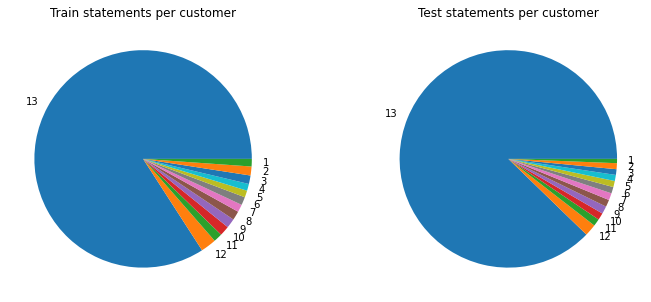

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
train_sc = df_train['customer_ID'].value_counts().value_counts().sort_index(ascending=False).rename('Train statements per customer')
ax1.pie(train_sc, labels=train_sc.index)
ax1.set_title(train_sc.name)
test_sc = df_test['customer_ID'].value_counts().value_counts().sort_index(ascending=False).rename('Test statements per customer')
ax2.pie(test_sc, labels=test_sc.index)
ax2.set_title(test_sc.name)
plt.show()

1. 在用户历史数据中，训练集测试集中的用户，绝大多数都有13次历史行为，

## 样本记录的开始结束时间

In [11]:
print('训练集数据开始结束时间：')
df_train['S_2'].value_counts().sort_index(ascending=False)

2018-03-31     9836
2018-03-30    17293
2018-03-29    14414
2018-03-28    17263
2018-03-27    15457
              ...  
2017-03-05     7879
2017-03-04    14463
2017-03-03    13635
2017-03-02     8952
2017-03-01    10381
Name: S_2, Length: 396, dtype: int64

In [12]:
print('测试集数据开始结束时间：')
df_test['S_2'].value_counts().sort_index(ascending=False)

2019-10-31     9858
2019-10-30    16666
2019-10-29    14177
2019-10-28    16456
2019-10-27     9120
              ...  
2018-04-05     9340
2018-04-04    15625
2018-04-03    13296
2018-04-02    10239
2018-04-01     9080
Name: S_2, Length: 579, dtype: int64

## 训练集和测试集最新一条记录所在时间分布

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


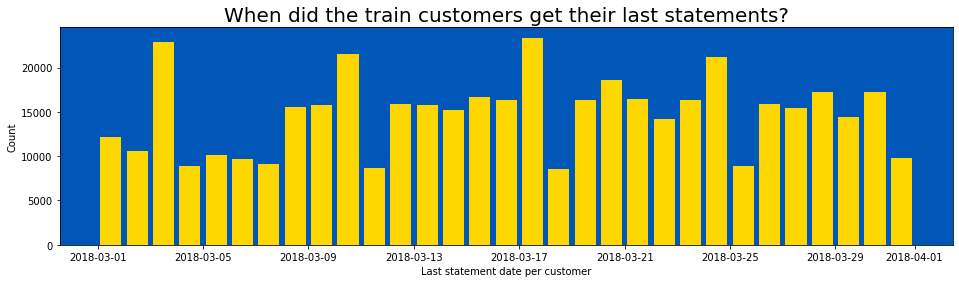

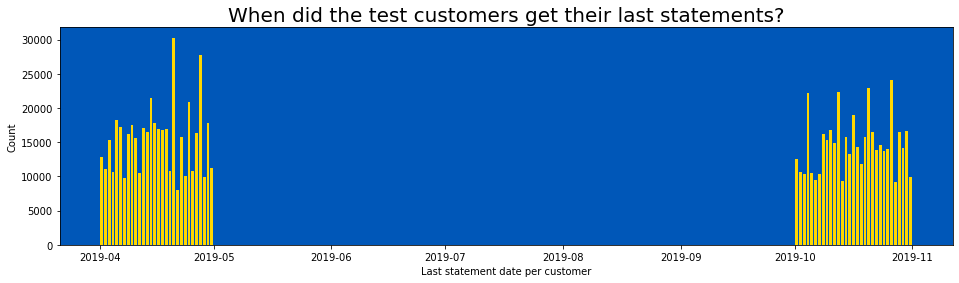

In [13]:
temp = df_train['S_2'].groupby(df_train['customer_ID']).max()
plt.figure(figsize=(16, 4))
plt.hist(temp, bins=pd.date_range("2018-03-01", "2018-04-01", freq="d"),
         rwidth=0.8, color='#ffd700')
plt.title('When did the train customers get their last statements?', fontsize=20)
plt.xlabel('Last statement date per customer')
plt.ylabel('Count')
plt.gca().set_facecolor('#0057b8')
plt.show()
del temp

temp = df_test['S_2'].groupby(df_test['customer_ID']).max()
plt.figure(figsize=(16, 4))
plt.hist(temp, bins=pd.date_range("2019-04-01", "2019-11-01", freq="d"),
         rwidth=0.74, color='#ffd700')
plt.title('When did the test customers get their last statements?', fontsize=20)
plt.xlabel('Last statement date per customer')
plt.ylabel('Count')
plt.gca().set_facecolor('#0057b8')
plt.show()
del temp

1. 训练集中用户最新一次点击时间都聚集在一个月中，为201803-201804
2. 测试集中用户最新一次点击时间分为两个时间段，一个是201904-201905，一个是201910-201911

## 训练集和测试集时间范围分布

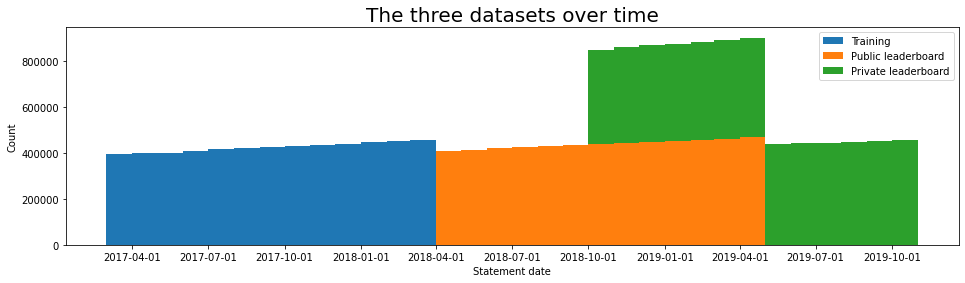

In [14]:
temp = pd.concat([df_train[['customer_ID', 'S_2']], df_test[['customer_ID', 'S_2']]], axis=0)
temp.set_index('customer_ID', inplace=True)
temp['last_month'] = temp.groupby('customer_ID').S_2.max().dt.month
last_month = temp['last_month'].values

plt.figure(figsize=(16, 4))
plt.hist([temp.S_2[temp.last_month == 3],   # ending 03/18 -> training
          temp.S_2[temp.last_month == 4],   # ending 04/19 -> public lb
          temp.S_2[temp.last_month == 10]], # ending 10/19 -> private lb
         bins=pd.date_range("2017-03-01", "2019-11-01", freq="MS"),
         label=['Training', 'Public leaderboard', 'Private leaderboard'],
         stacked=True)
plt.xticks(pd.date_range("2017-03-01", "2019-11-01", freq="QS"))
plt.xlabel('Statement date')
plt.ylabel('Count')
plt.title('The three datasets over time', fontsize=20)
plt.legend()
plt.show()


1. 训练集和测试集之间数据历史没有重叠

## 特征结果

1. 给到的训练集，测试集的数据为历史数据，无法直接用来建模，
2. 训练集数据条数共5531451条，涵盖了458913个用户的历史数据，测试集数据条数共11363762条，涵盖了924621个用户的历史数据
3. 在用户历史数据中，训练集测试集中的用户，绝大多数都有13次历史行为，其中训练集和测试集有相似的分布
4. 训练集中用户最新一次点击时间都聚集在一个月中，为201803-201804
5. 测试集中用户最新一次点击时间分为两个时间段，一个是201904-201905，一个是201910-201911
6. 训练集和测试集之间数据历史没有重叠
7. 这也就说明，若是建模，如使用评分卡，将不能按照时间来划分数据集，尽管它是时间序列类型的数据，这是由于它的最新数据都在同一个月，
建议直接进行随机拆分。若是这样则需要重新考虑训练集和测试集合特征稳定性的问题。

# 特征可视化

# 特征工程

由于数据为用户历史还款记录数据，为构建X变量，可考虑如下做法：
1. 业务，直接取用户最新一条记录作为特征。
2. 暴力，直接对用户全历史计算统计特征，类别特征考虑['count', 'nunique']，数值特征考虑['mean', 'std', 'min', 'max']。
3. 业务，用户最新一条记录与用户第一条记录的差和比。
4. 业务，用户近一个月，三个月，六个月，十二个月的统计特征计算，类别特征考虑['count', 'nunique']，数值特征考虑['mean', 'std', 'min', 'max']。
5. 业务，用户最新一条记录与4中得到的特征中['mean', 'max', 'min']的差和比。

# 模型

1. baseline采用一套评分卡的逻辑进行建立。
2. 直接使用lightgbm进行建模，建模的同时采用五折交叉验证的方式，优化目标为比赛所用的指标。

# 下一步优化目标
1. 尝试特征选择，也许很多特征只是噪音，因为执行排列重要性并将特征数量减少到 1000 个特征，CV几乎相同。也许有更好的特征选择技术可以提高性能。如null importance 和Boruta。
2. 尝试不同的模型，也许一些具有相同特征或特征子集的神经网络与LGBM集成是有效的，根据经验，混合树模型和神经网络效果很好，因为它们非常多样化，所以会有提示。
3. 可以尝试更多的特征工程，也许我们可以创建更多的特征来提取数据集的隐藏信号。